# Description of Ant-V2 in MuJoCo

In [1]:
import gym,mujoco_py,warnings
# Remove annoying warning signs
gym.logger.set_level(40)
warnings.filterwarnings("ignore") 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'
from gym.envs import mujoco
np.set_printoptions(precision=3)
print ("Packages Loaded")

Packages Loaded


### Open Ant-V2

In [2]:
env = mujoco.AntEnv()
obs_dim = env.observation_space.shape[0]
act_dim = env.action_space.shape[0]
env.reset() # Reset 
# render_img = env.render(mode='rgb_array')
print ("Environment initialized.")

Environment initialized.


### In observations, 
#### (1) height z
#### (4) quartanion
#### (8) joint angle in rad

### Set pos and plot

Creating window glfw


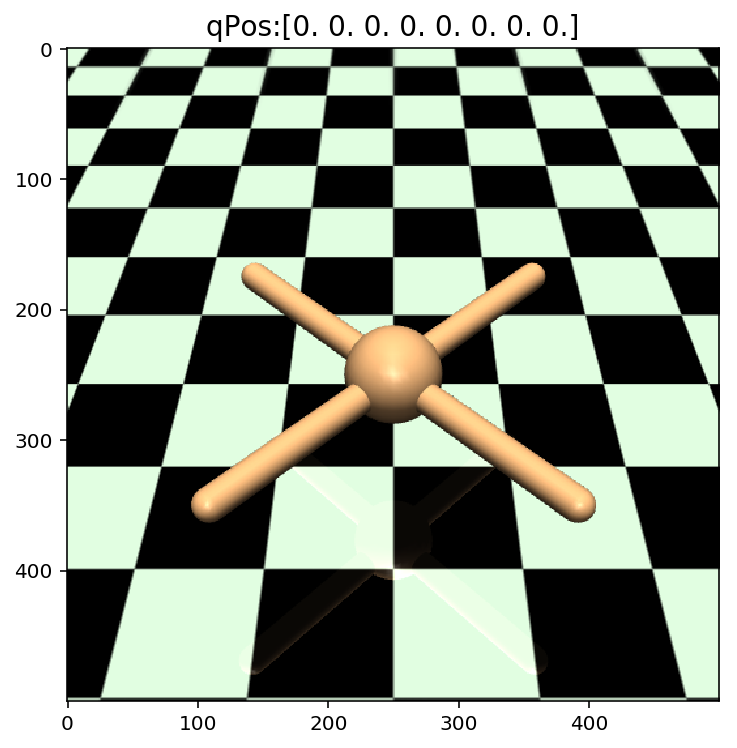

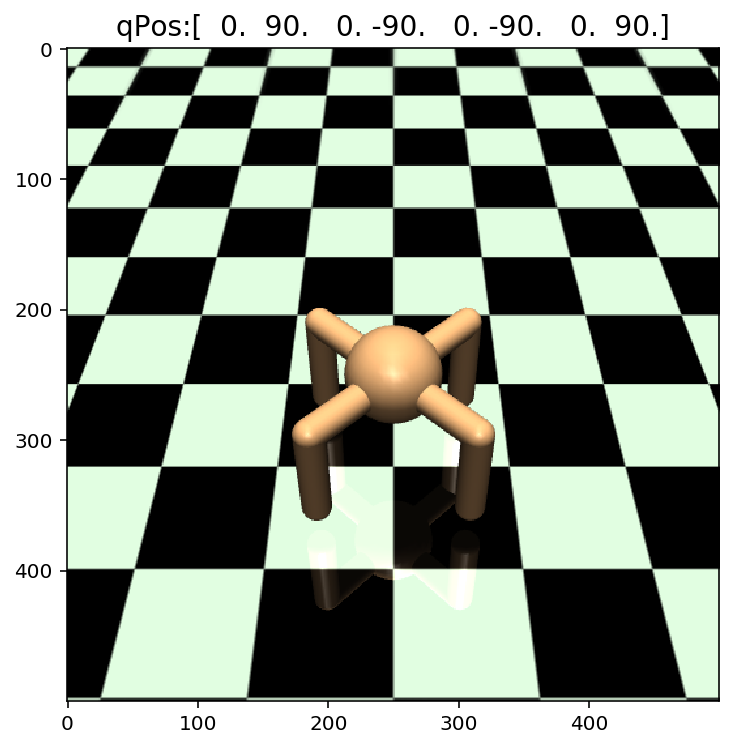

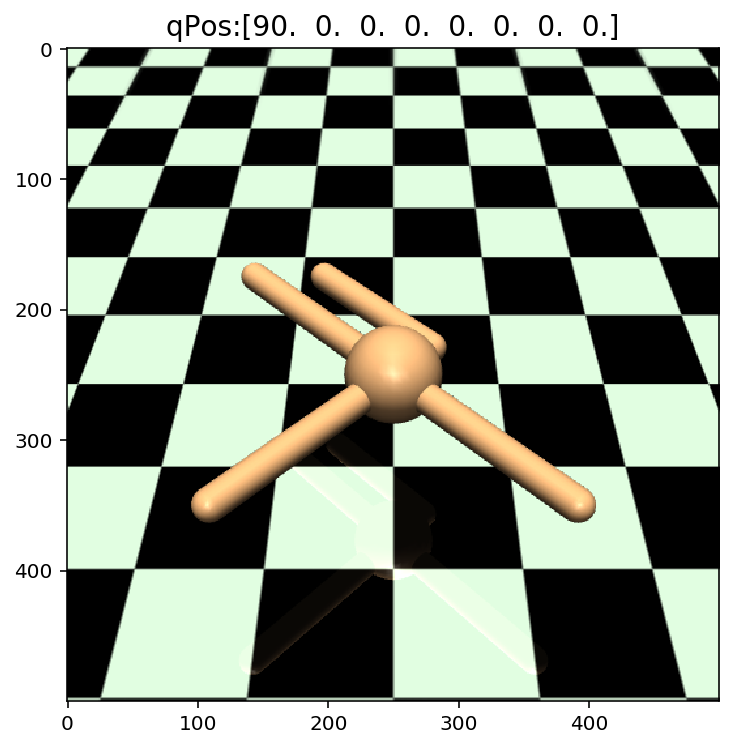

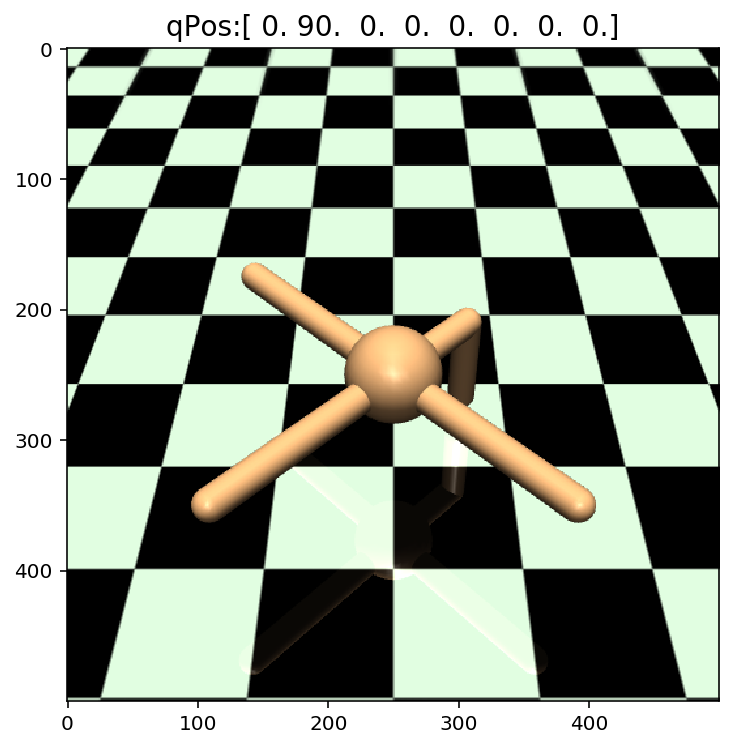

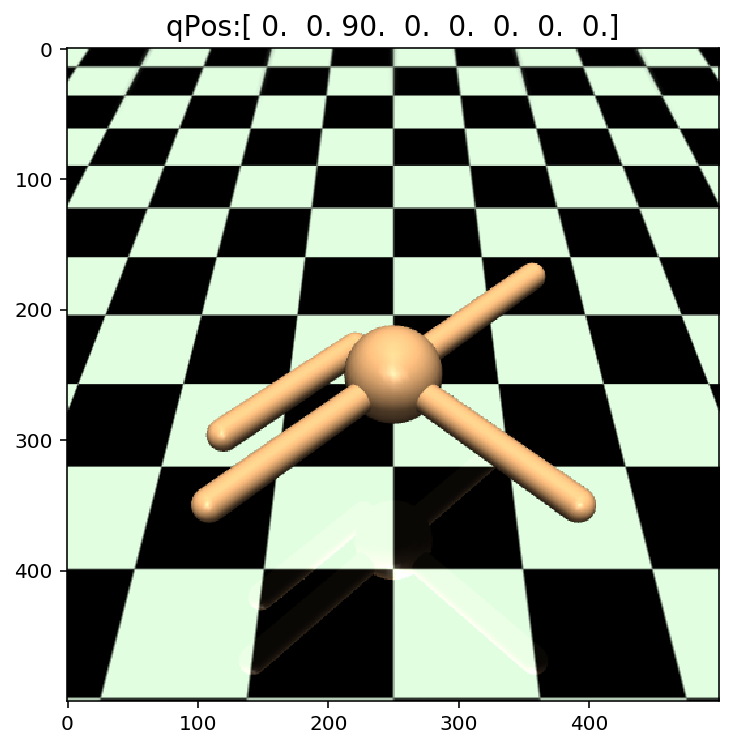

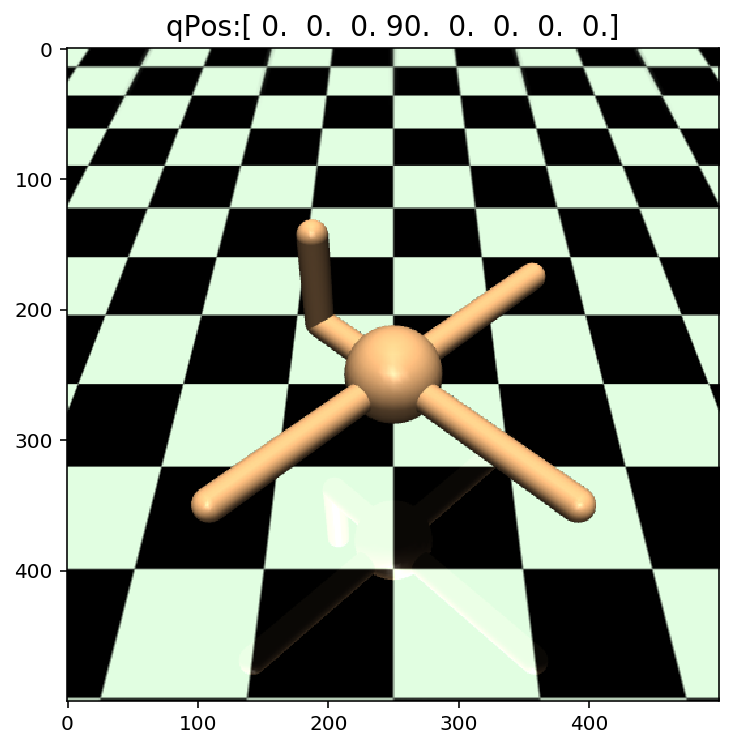

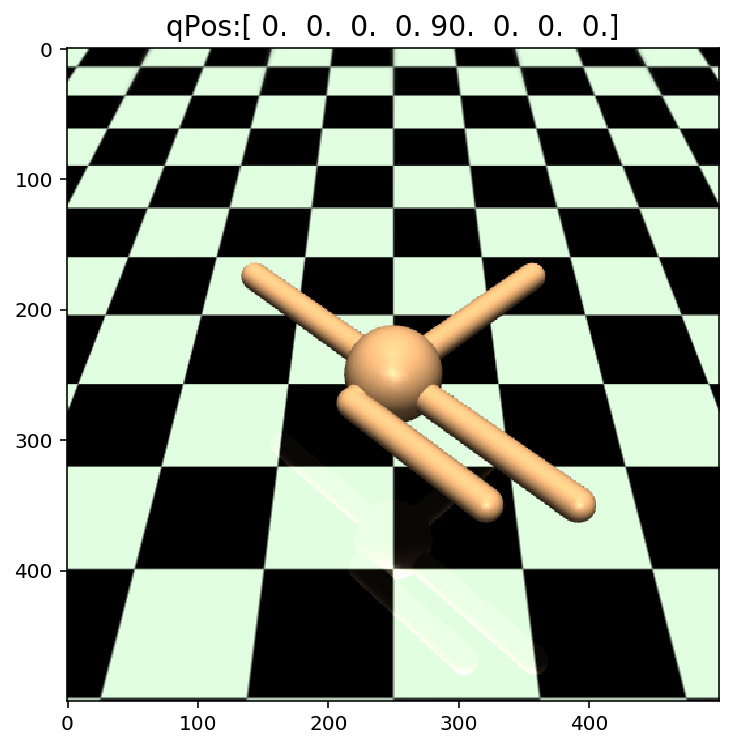

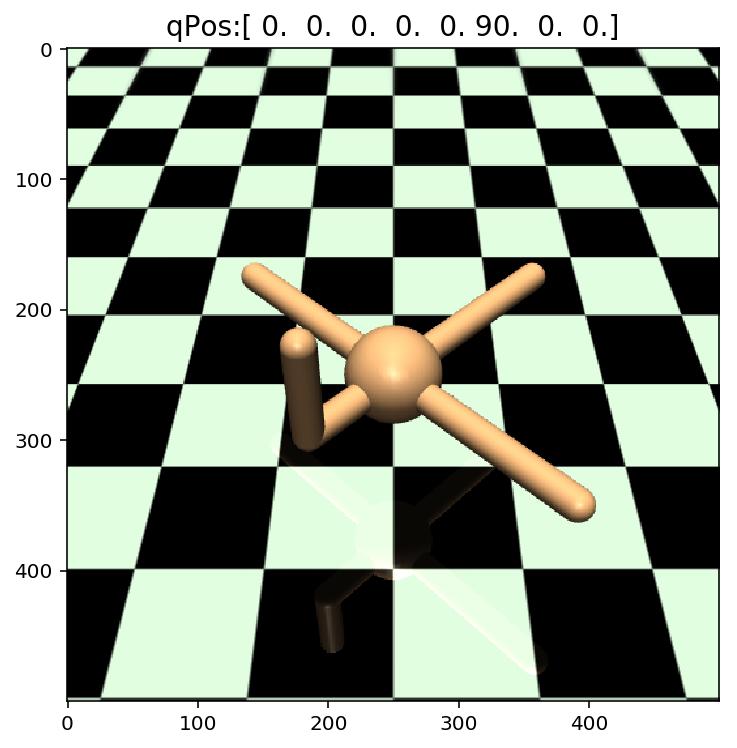

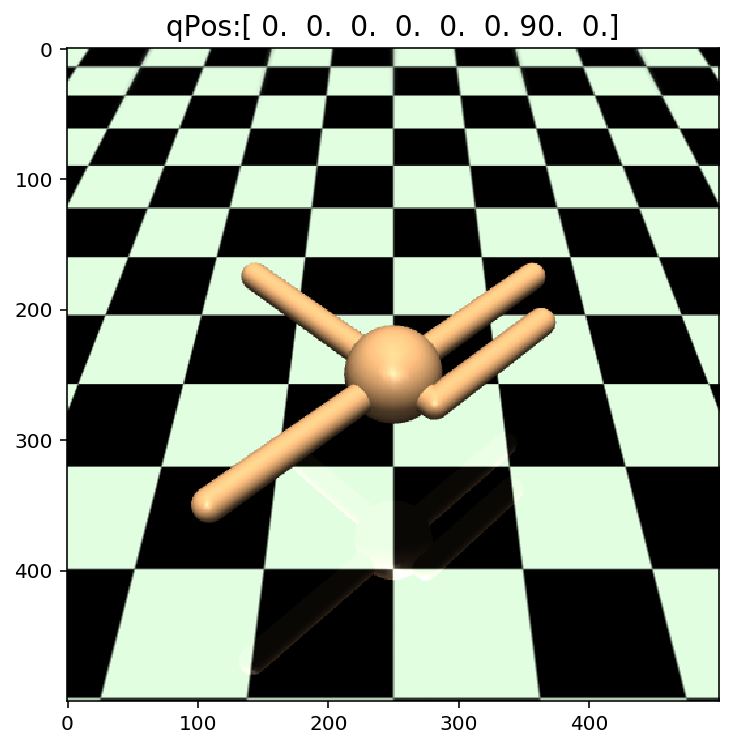

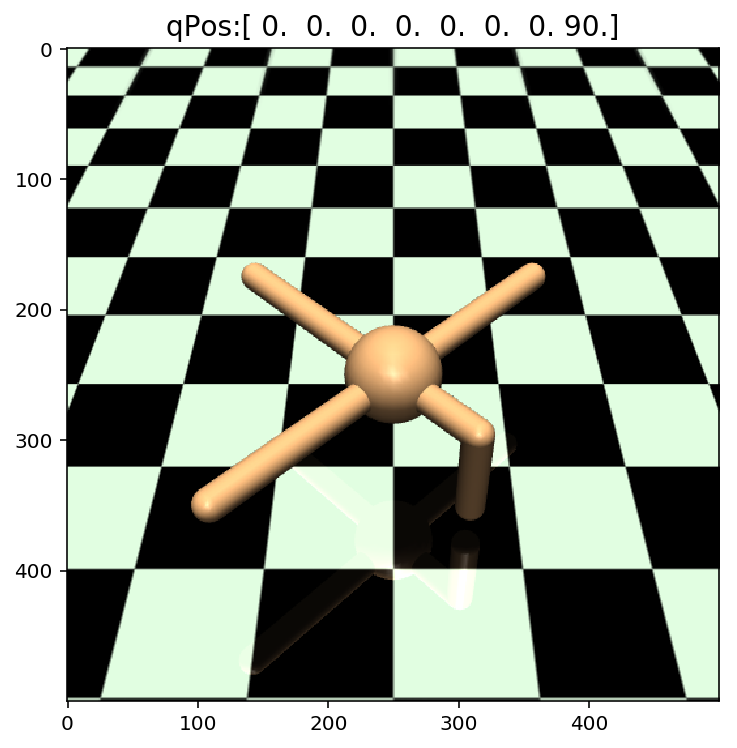

In [3]:
pos = env.init_qpos
jPosList = [[0,0,0,0,0,0,0,0],[0,90,0,-90,0,-90,0,90]
           ,[90,0,0,0,0,0,0,0],[0,90,0,0,0,0,0,0],[0,0,90,0,0,0,0,0]
           ,[0,0,0,90,0,0,0,0],[0,0,0,0,90,0,0,0],[0,0,0,0,0,90,0,0]
           ,[0,0,0,0,0,0,90,0],[0,0,0,0,0,0,0,90]]
for jPos in jPosList:
    # Modify joint postion (only)
    pos[7:] = np.asarray(jPos).astype(np.float32)*np.pi/180.0
    env.set_state(pos,env.init_qvel) # Init state
    # Plot
    render_img = env.render(mode='rgb_array')
    plt.figure(figsize=(6,6));plt.imshow(render_img);
    plt.title('qPos:%s'%(pos[7:]*180.0/np.pi),fontsize=14);plt.show()

### Set action and plot

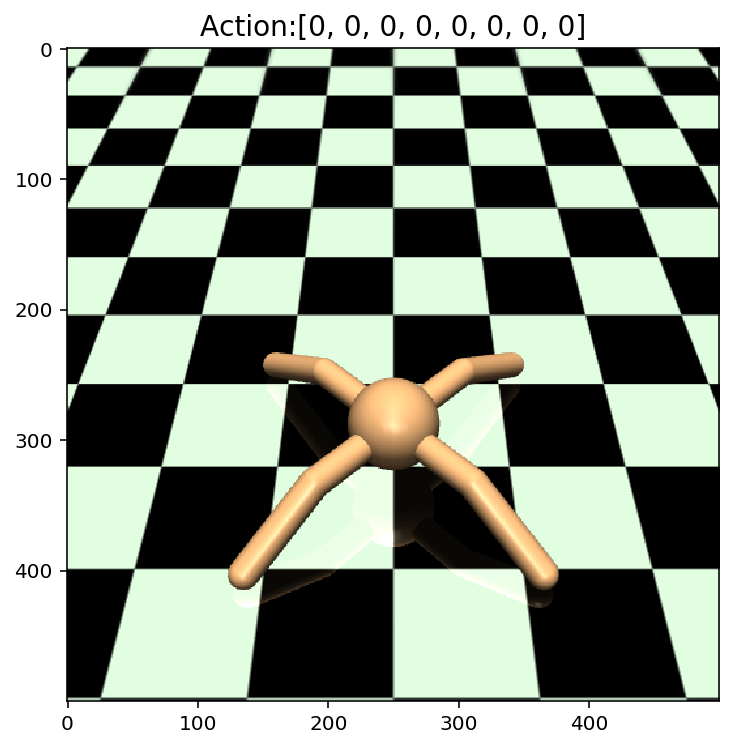

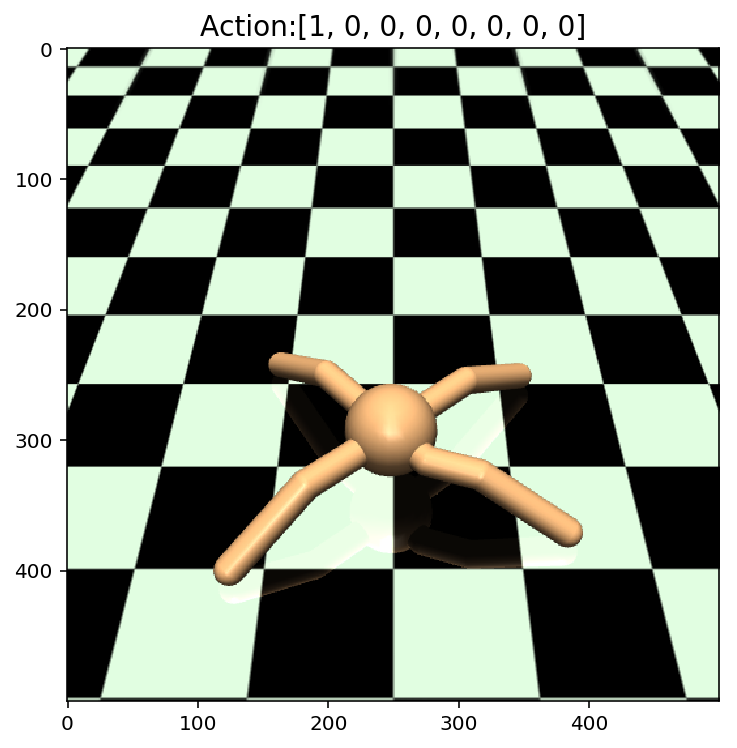

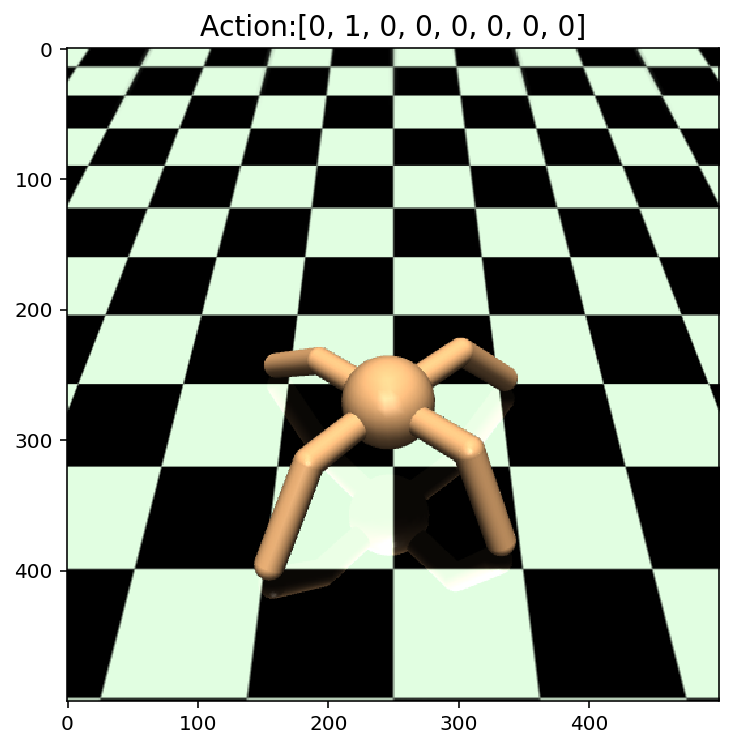

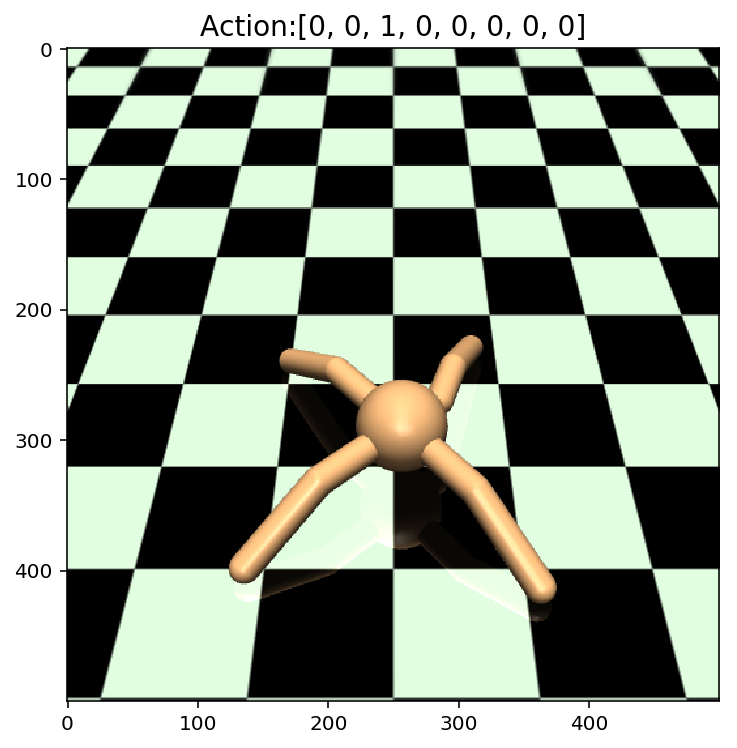

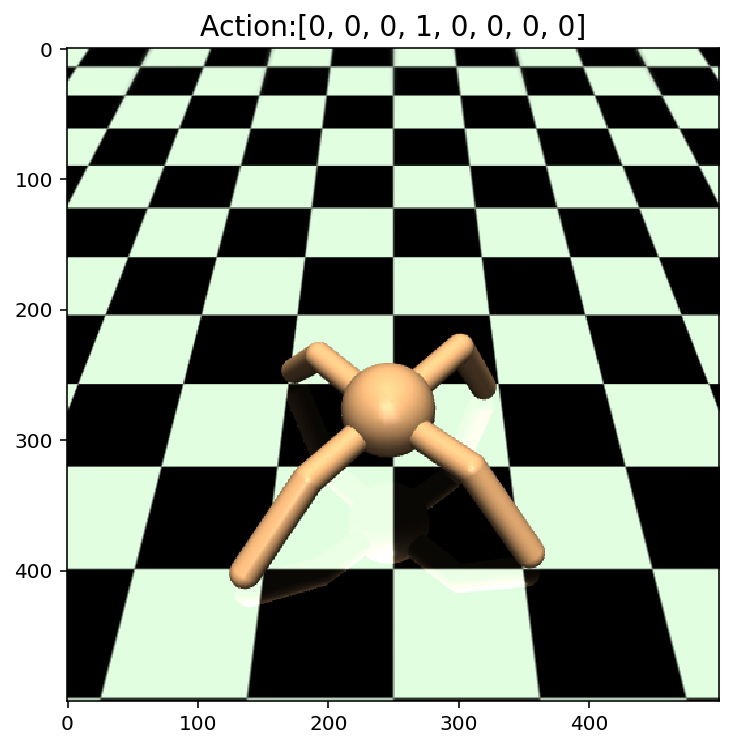

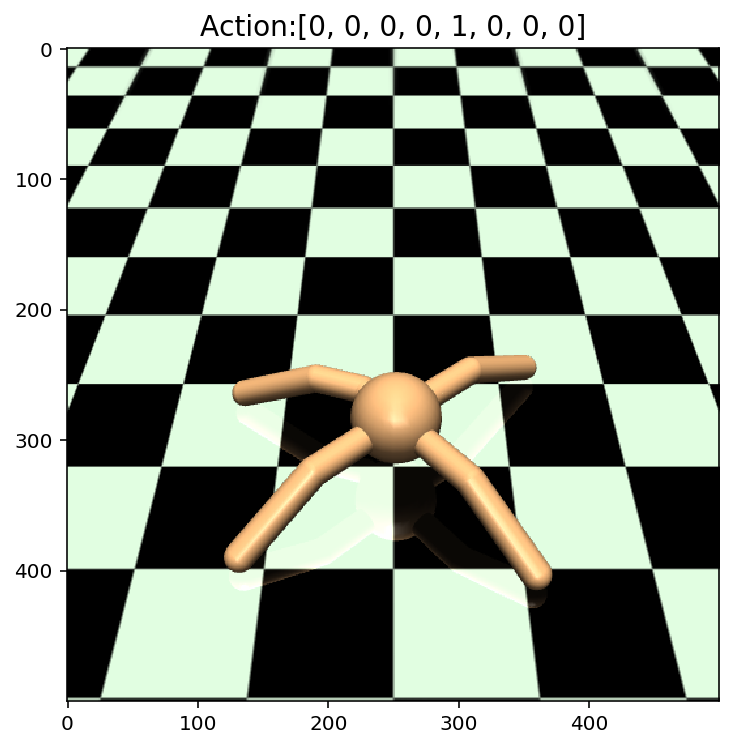

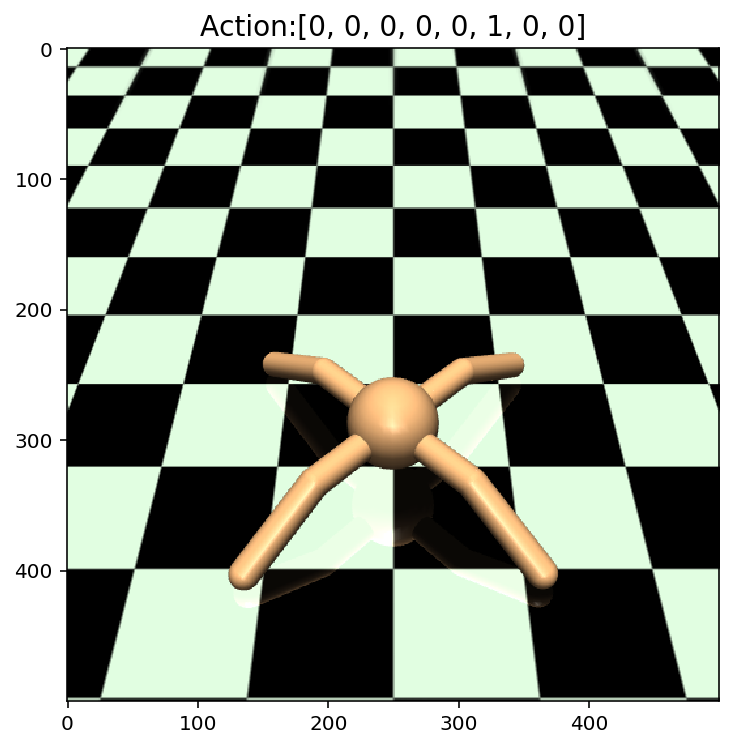

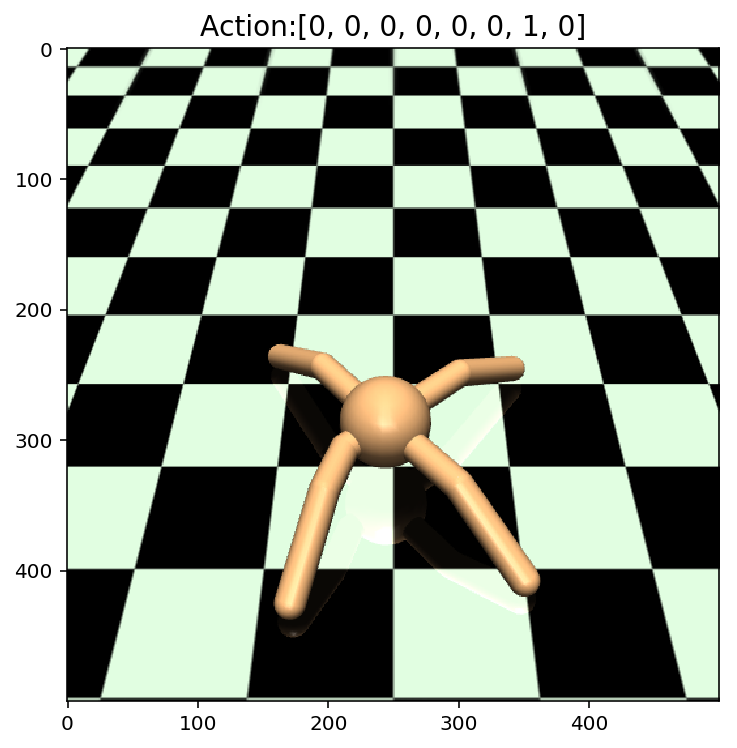

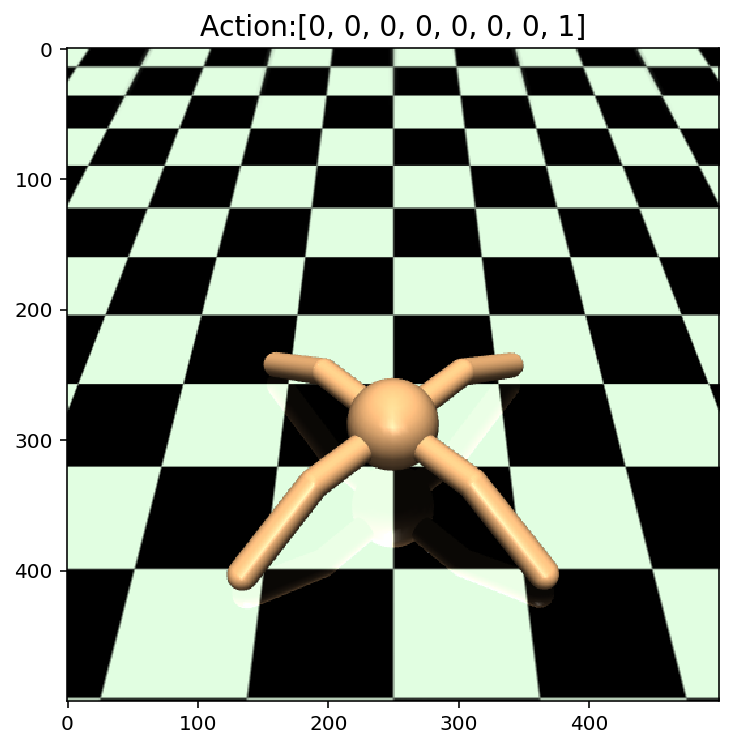

In [8]:
pos = env.init_qpos
actionList = [[0,0,0,0,0,0,0,0]
           ,[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0]
           ,[0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0]
           ,[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1]]
for action in actionList:
    # Init pos
    pos[7:] = np.asarray([0,90,0,-90,0,-90,0,90]).astype(np.float32)*np.pi/180.0
    env.reset()
    env.set_state(pos,env.init_qvel) # Init state
    for i in range(100):
        obs,reward,done,_ = env.step(np.asarray(action).astype(np.float16))
    # Plot
    render_img = env.render(mode='rgb_array')
    plt.figure(figsize=(6,6));plt.imshow(render_img);
    plt.title('Action:%s'%(action),fontsize=14);plt.show()

### Others

In [16]:
env.reset() # Reset
for tick in range(10):
    env.step(np.zeros(act_dim))
    t = env.sim.data.time
    print ('tick:[%d] time:[%.2f]sec'%(tick,t))

tick:[0] time:[0.05]sec
tick:[1] time:[0.10]sec
tick:[2] time:[0.15]sec
tick:[3] time:[0.20]sec
tick:[4] time:[0.25]sec
tick:[5] time:[0.30]sec
tick:[6] time:[0.35]sec
tick:[7] time:[0.40]sec
tick:[8] time:[0.45]sec
tick:[9] time:[0.50]sec
